In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
cd ..

/Users/Kelly/galvanize/week8


In [4]:
from full_df import df, all_img, bw_img

0 44446
1000 44446
2000 44446
3000 44446
4000 44446
5000 44446
6000 44446
7000 44446
8000 44446
9000 44446
10000 44446
11000 44446
12000 44446
13000 44446
14000 44446
15000 44446
16000 44446
17000 44446
18000 44446
19000 44446
20000 44446
21000 44446
22000 44446
23000 44446
24000 44446
25000 44446
26000 44446
27000 44446
28000 44446
29000 44446
30000 44446
31000 44446
32000 44446
33000 44446
34000 44446
35000 44446
36000 44446
37000 44446
38000 44446
39000 44446
40000 44446
41000 44446
42000 44446
43000 44446
44000 44446


In [5]:
from subset_df import apparel_subset, accessory_subset, shoe_subset, wearable_subset

In [4]:
# apparel_df, apparel_img = apparel_subset(df, all_img)
BW_apparel_df, BW_apparel_img = apparel_subset(df, bw_img)

In [5]:
# accessory_df, accessory_img = accessory_subset(df, all_img)
BW_accessory_df, BW_accessory_img = accessory_subset(df, bw_img)

In [6]:
# footwear_df, footwear_img = shoe_subset(df, all_img)
BW_footwear_df, BW_footwear_img = shoe_subset(df, bw_img)

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
wear_df, wear_img = wearable_subset(df, bw_img)

In [7]:
pca = PCA(n_components=2)

NameError: name 'PCA' is not defined

In [8]:
#apparel_pca = pca.fit_transform(apparel_img[0:10000])
wear_pca = pca.fit_transform(wear_img)

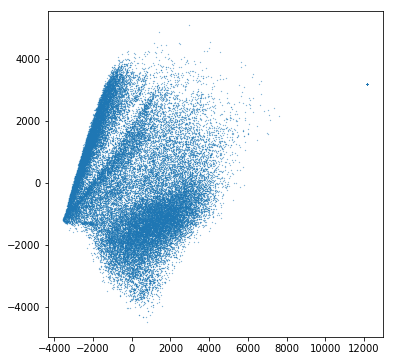

In [116]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(*wear_pca.T, s=.05 );

In [11]:
from sklearn.cluster import KMeans

In [16]:
wear_pca.shape

(41911, 2)

In [36]:
km3 = KMeans(3)
km4 = KMeans(4)
km5 = KMeans(5)
km6 = KMeans(6)

In [37]:
y3 = km3.fit_predict(wear_pca)

In [43]:
y4 = km4.fit_predict(wear_pca)

In [44]:
y5 = km5.fit_predict(wear_pca)

In [45]:
y6 = km6.fit_predict(wear_pca)

In [130]:
col3 = []
for x in y3: 
    col3.append(['#FFA500', '#FF6347', 'teal'][x])

col4 = []
for x in y4: 
    col4.append(['#FFA500', '#FF6347', 'teal', '#B22222'][x])

col5 = []
for x in y5: 
    col5.append(['#FFA500', '#FF6347', 'teal', '#B22222', '#A9A9A9'][x])
col6 = []
for x in y6: 
    col6.append(['#FFA500', '#FF6347', 'black', '#B22222', '#A9A9A9', 'teal'][x])    

# col3 = []
# for x in y: 
#     col3.append(['#FFA500', '#FF6347', 'teal'][x])

size3 = []
for x in y3: 
    size3.append([.07, .07, .9][x])

size4 = []
for x in y4: 
    size4.append([.07, .07, .9, .07][x])
    
size5 = []
for x in y5: 
    size5.append([.07, .07, .07, .9, .07][x])
    
size6 = []
for x in y6: 
    size6.append([.07, .07, .9, .07, .07, .07][x])

In [131]:
ys = [y3, y4, y5, y6]
colors = [col3, col4, col5, col6]
sz = [size3, size4, size5, size6]

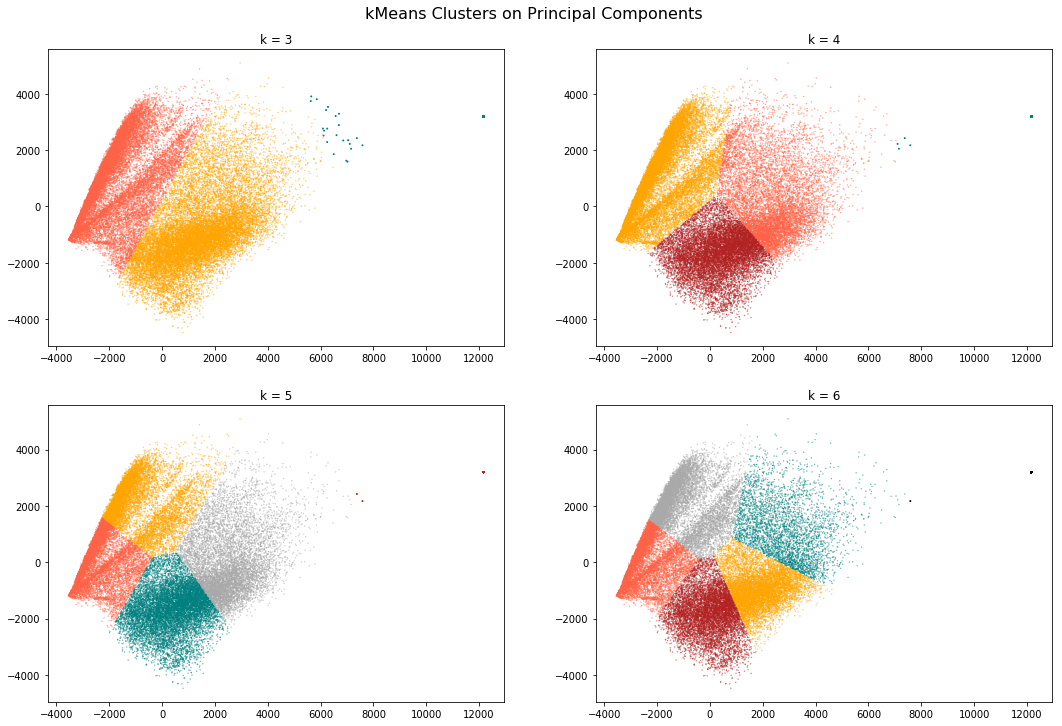

In [138]:
# fig, axs = plt.subplots(2, 3)

# for i, ax in enumerate(axs.flatten()):
    
    
fig, axs = plt.subplots(2,2, figsize=(18,12))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(*wear_pca.T, s=sz[i], c=colors[i])
    ax.set_title('k = {}'.format(i+3))
fig.suptitle("kMeans Clusters on Principal Components", fontsize=16, y =.93);

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1


https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [9]:
XX = TSNE(n_components=2, n_iter=1000, perplexity=100).fit_transform(wear_img[0:5000])


In [11]:
colors = {'Apparel':'orange','Accessories':'teal','Footwear':'red', 'Personal Care':'grey', 'Free Items':'yellow', 'Sporting Goods':'black', 'Home':'magenta'}
wear_df['color'] = wear_df.loc[:,'masterCategory'].apply(lambda x: colors[x])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


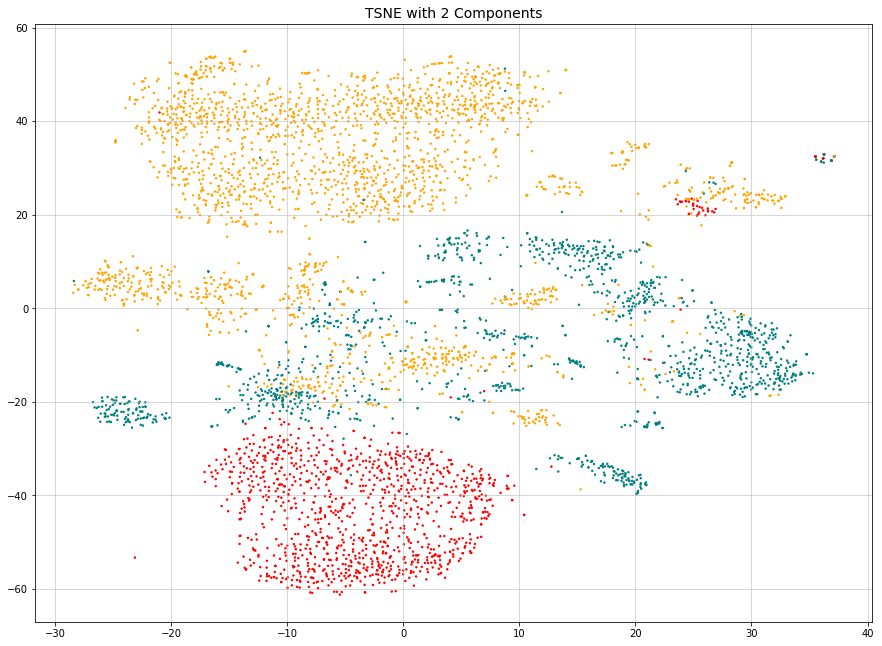

In [30]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(XX[:,0],XX[:,1], s=2, color= wear_df['color'][0:5000]);
ax.set_title('TSNE with 2 Components', fontsize=14)
ax.grid(which='both', axis='both', linewidth=.5)

In [56]:
hh = XX[np.where((XX[:,0] < -20)&(XX[:,1] < -15))]
hh

array([[-22.774124, -20.346182],
       [-20.455362, -23.625578],
       [-22.704477, -20.007967],
       [-21.978806, -22.644001],
       [-24.94574 , -19.697615],
       [-20.140623, -23.411764],
       [-22.597904, -22.071913],
       [-24.71176 , -21.912083],
       [-23.97537 , -18.995596],
       [-21.50517 , -23.783325],
       [-24.856987, -20.28332 ],
       [-25.253538, -21.0575  ],
       [-22.442427, -21.133547],
       [-22.312042, -23.397024],
       [-23.076443, -19.381037],
       [-25.721485, -22.529123],
       [-22.042685, -23.179192],
       [-26.279638, -23.448757],
       [-25.633547, -23.135523],
       [-23.662281, -21.554241],
       [-22.467157, -22.133026],
       [-20.41098 , -22.470367],
       [-22.715864, -21.186441],
       [-21.57492 , -24.442022],
       [-25.371437, -21.58458 ],
       [-21.338032, -23.152035],
       [-25.021261, -20.69515 ],
       [-24.990335, -22.771133],
       [-22.976732, -21.455084],
       [-23.11848 , -53.333103],
       [-2

In [25]:
#np.save('tsne', XX)

In [ ]:
{'Topwear':'blue', 'Shoes':'red', 'Bags':'green', 'Bottomwear':'magenta', 'Watches':'yellow', 'Innerwear':'purple',
       'Jewellery', 'Eyewear', 'Fragrance', 'Sandal', 'Wallets', 'Flip Flops',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Cufflinks', 'Apparel Set', 'Free Gifts', 'Stoles', 'Skin Care', 'Skin',
       'Eyes', 'Mufflers', 'Shoe Accessories', 'Sports Equipment', 'Gloves',
       'Hair', 'Bath and Body', 'Water Bottle', 'Umbrellas', 'Perfumes',
       'Wristbands', 'Beauty Accessories', 'Sports Accessories', 'Vouchers',
       'Home Furnishing'}

In [20]:
{'dark cyan':'#008B8B', 'grey':'#808080', "medium_turquoise":'#BA55D3', 'coral':'#F08080', 'dark red':'#8B0000', 'dark orange':'#FF8C00', 'light orange':'#F4A460'}

{'dark cyan': '#008B8B',
 'grey': '#808080',
 'medium_turquoise': '#BA55D3',
 'coral': '#F08080',
 'dark red': '#8B0000',
 'dark orange': '#FF8C00',
 'light orange': '#F4A460'}

In [ ]:
XX = TSNE(n_components=2, n_iter=700, perplexity=50).fit_transform(bw_img[0:10000])
plt.scatter(XX[:,0],XX[:,1])

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
'''

## clust = AgglomerativeClustering(n_clusters=3).fit(df.wear_pics[0:100])
clust = AgglomerativeClustering(n_clusters=3).fit(df.wear_pics)

## a = df.wear_pics[0:100].index
a = df.wear_pics.index
b = df.wearable_df.loc[a,:]
c = clust.labels_

b['category_group'] = b['masterCategory'].apply(lambda x: 0 if x =='Apparel' else (1 if x=='Accessories' else 2))
b['cluster_group'] = c
d = b[['category_group', 'cluster_group']]

d[d['category_group']==0].groupby('cluster_group').count() 
d[d['category_group']==1].groupby('cluster_group').count() 
d[d['category_group']==2].groupby('cluster_group').count()


'''

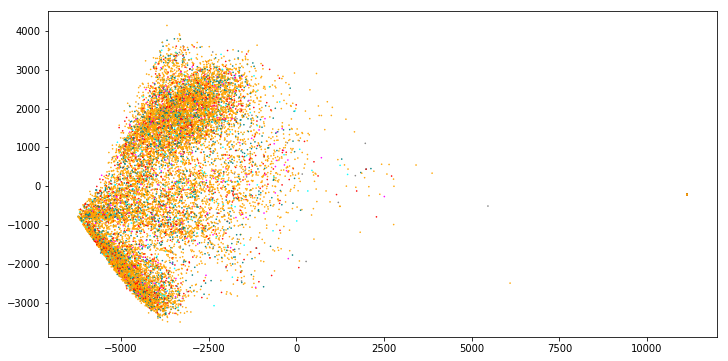

In [29]:
apparel_subset_colors = {'Bottomwear':'teal','Topwear':'orange','Dress':'magenta', 'Saree':'grey', 'Loungewear and Nightwear':'cyan', 'Innerwear':'red', 'Apparel Set':'cyan', 'Socks':'cyan'  }
col_app_color = apparel_df.loc[:,'subCategory'].apply(lambda x: apparel_subset_colors[x])
apparel_df.loc[:,'colors'] = col_app_color

fig, ax = plt.subplots(figsize=(12,6))
#ax[0].scatter( *apparel_pca.T, s=.35 , color=apparel_df['colors'][0:10000])
ax.scatter( *BW_apparel_pca.T, s=.35 , color=apparel_df['colors']);

In [22]:
#shoe_pca = pca.fit_transform(footwear_img[0:10000])
BW_shoe_pca = pca.fit_transform(BW_footwear_img)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


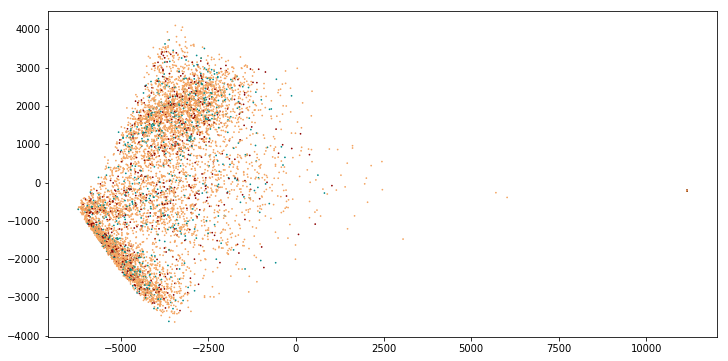

In [23]:
shoe_subset_colors = {'Shoes':'#F4A460','Sandal':'#008B8B','Flip Flops':'#8B0000'}
footwear_df['colors'] = footwear_df.loc[:,'subCategory'].apply(lambda x: shoe_subset_colors[x])

fig, ax = plt.subplots(figsize=(12,6))
#ax[0].scatter( *shoe_pca.T, s=.5 , color=footwear_df['colors'][0:10000])
ax.scatter( *BW_shoe_pca.T, s=.5, color=footwear_df['colors']);